In [1]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# 1. Memuat Dataset
uploaded = files.upload()
df = pd.read_csv('MaterialStrength.csv')

# Cetak nama kolom dalam dataset untuk memastikan nama kolom yang benar
print(df.columns)

Saving MaterialStrength.csv to MaterialStrength.csv
Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'target_feature'],
      dtype='object')


In [2]:
# 2. Pemrosesan awal
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Definisikan X (fitur) dan y (target)
X = df[['x1']]  # Menggunakan kolom fitur
y = df['target_feature']  # Memastikan Target yang akan digunakan

# 3. Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# 4. Melatih model Regresi Linier
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 5. Melatih model Regresi Polinomial (Fungsi Basis)
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# 6. Melatih Regressor Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# 7. Mealtih Regressor K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)  # Dapat menyetel jumlah tetangga
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [4]:
# 8. Mengevaluasi model
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-Squared: {r2:.4f}\n")

# Mengevaluasi Regresi Linear
evaluate_model(y_test, y_pred_linear, "Linear Regression")

# Mengevaluasi Regresi Polinomial
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")

# Mengevaluasi Regresi Decision Tree
evaluate_model(y_test, y_pred_dt, "Decision Tree Regressor")

# Mengevaluasi Regresi K-Nearest Neighbors
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors Regressor")

Linear Regression Evaluation:
MSE: 192.7848
RMSE: 13.8847
R-Squared: 0.2518

Polynomial Regression Evaluation:
MSE: 193.1449
RMSE: 13.8977
R-Squared: 0.2504

Decision Tree Regressor Evaluation:
MSE: 188.6697
RMSE: 13.7357
R-Squared: 0.2678

K-Nearest Neighbors Regressor Evaluation:
MSE: 187.4407
RMSE: 13.6909
R-Squared: 0.2726



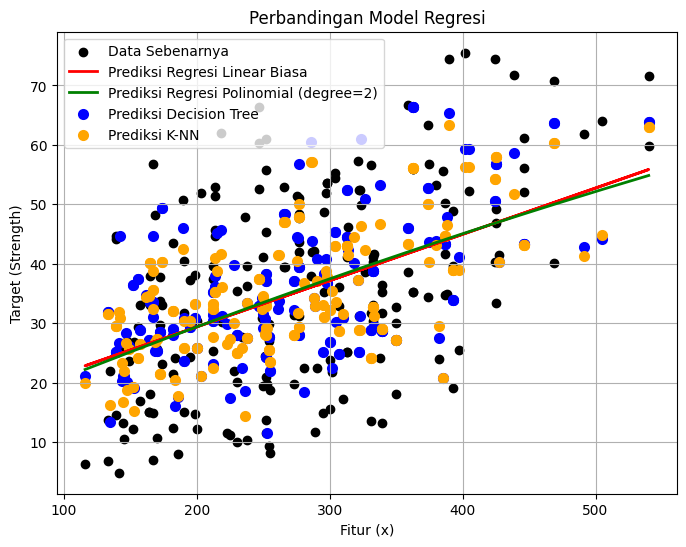

In [5]:
# 9. Merencanakan perbandingan
plt.figure(figsize=(8, 6))

# Plot titik data
plt.scatter(X_test, y_test, color='black', label='Data Sebenarnya')

# Plot Garis Regresi Linear
plt.plot(X_test, y_pred_linear, color='red', label='Prediksi Regresi Linear Biasa', linewidth=2)

# Plot kurva Regresi Polinomial
sorted_zip = sorted(zip(X_test['x1'], y_pred_poly))
X_test_sorted, y_pred_poly_sorted = zip(*sorted_zip)
plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', label=f'Prediksi Regresi Polinomial (degree={degree})', linewidth=2)

# Plot prediksi Decision Tree
plt.scatter(X_test, y_pred_dt, color='blue', label='Prediksi Decision Tree', linewidth=2)

# Plot prediksi K-NN
plt.scatter(X_test, y_pred_knn, color='orange', label='Prediksi K-NN', linewidth=2)

# Mengatur label dan judul
plt.xlabel('Fitur (x)')
plt.ylabel('Target (Strength)')
plt.title('Perbandingan Model Regresi')
plt.legend()

# Menunjukkan plot
plt.grid(True)
plt.show()
